<a href="https://colab.research.google.com/github/arkothiwala/deep-learning/blob/master/AV_Intel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is solution to the AnalyticsVidya  Datahack: 
INTEL Scene Classification Challenge

[![alt text](https://datahack.analyticsvidhya.com/media/__sized__/contest_cover/1920X480_2-thumbnail-1200x1200-90.jpg)](https://datahack.analyticsvidhya.com/contest/practice-problem-intel-scene-classification-challe/)

###Download dataset

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



**Download Training Data to CoLab**

*   Train file download on competiton page will lead to [following URL](https://drive.google.com/uc?id=10qN7OUzTutCg8ruwFosml0xzi0elsI5N&export=download)
*   URL looks something like this


---

 `https://drive.google.com/uc?id=10qN7OUzTutCg8ruwFosml0xzi0elsI5N&export=download`


---

We can download this file directly to our CoLab using  **id=10qN7OUzTutCg8ruwFosml0xzi0elsI5N** from URL






In [0]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '10qN7OUzTutCg8ruwFosml0xzi0elsI5N' #File ID for the required Trainingdata
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train-scene classification.zip')

Extract Training Data from zip File

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train-scene classification.zip', 'r')
zip_ref.extractall('data')
zip_ref.close()

Download Test data

In [19]:
testFile_url_AV = "https://datahack.analyticsvidhya.com/contest/practice-problem-intel-scene-classification-challe/download/test-file"
actual_url_AWS = "https://datahack-prod.s3.amazonaws.com/test_file/test_WyRytb0.csv"
import urllib.request
urllib.request.urlretrieve (Url, "test.csv")


('test.csv', <http.client.HTTPMessage at 0x7f8a725877b8>)

Check if GPU is running

In [86]:
from google.colab import files
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

###Exploratory Data Analysis

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import fastai

In [0]:
#batch size
bs = 64

In [0]:
path_img = 'data/train'
fnames = get_image_files(path_img)

In [20]:
fnames[:5]

[PosixPath('data/train/18693.jpg'),
 PosixPath('data/train/11832.jpg'),
 PosixPath('data/train/12212.jpg'),
 PosixPath('data/train/12191.jpg'),
 PosixPath('data/train/12072.jpg')]

In [0]:
data = ImageDataBunch.from_csv(path_img, ds_tfms=get_transforms(), csv_labels='../train.csv', size=150, bs=bs).normalize(imagenet_stats)

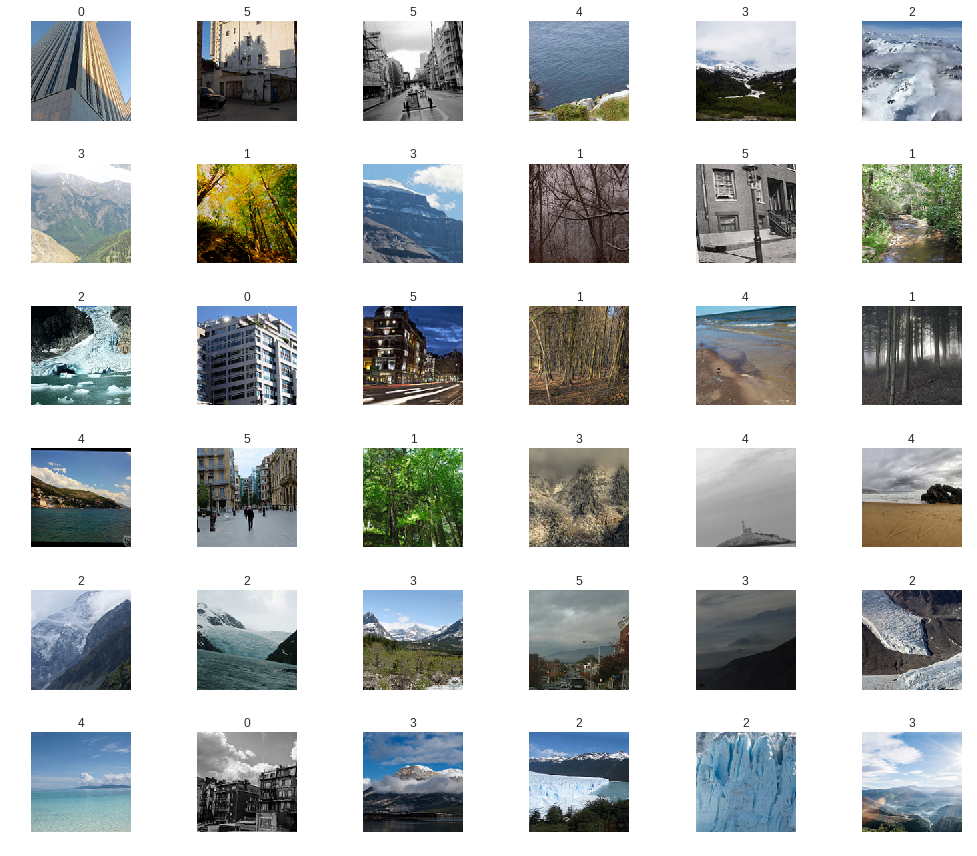

In [88]:
data.show_batch(rows=6, figsize=(14,12))

###Modelling

In [43]:
data.classes

[0, 1, 2, 3, 4, 5]

In [48]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 98904592.17it/s]


In [49]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.470165,0.280224,0.098356
2,0.337403,0.214924,0.078978
3,0.274205,0.198992,0.069877
4,0.260533,0.192982,0.072519


In [51]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.212542,0.204689,0.073987
2,0.230754,0.181761,0.066353
3,0.197849,0.163222,0.061950
4,0.177857,0.165607,0.061069


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [3]:
interp.plot_confusion_matrix()

NameError: ignored

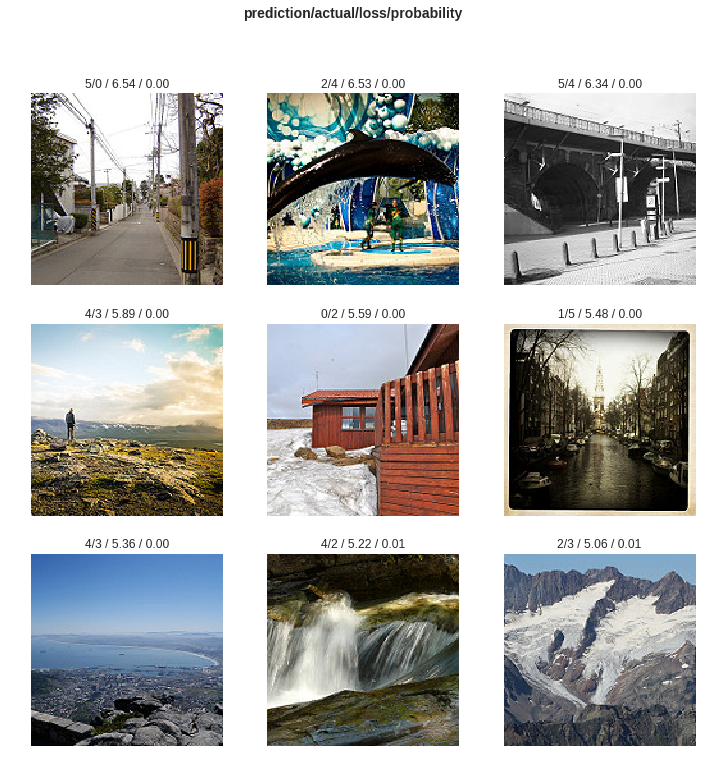

In [66]:
interp.plot_top_losses(9)

In [82]:
interp.y_true

tensor([2, 1, 4,  ..., 5, 2, 4])

In [0]:
doc(ImageDataBunch.from_csv)

In [0]:
#data = ImageDataBunch.from_csv(path_img, ds_tfms=get_transforms(), csv_labels='../test_WyRytb0.csv', size=150, bs=bs).normalize(imagenet_stats)
data.test_ds

In [98]:
learn.predict(is_test=True)

TypeError: ignored

In [0]:
import pandas
test_df = pandas.read_csv('test_WyRytb0.csv')

In [2]:
test_df.columns

NameError: ignored

In [111]:
help(pandas.DataFrame.from_csv)

Help on method from_csv in module pandas.core.frame:

from_csv(path, header=0, sep=',', index_col=0, parse_dates=True, encoding=None, tupleize_cols=None, infer_datetime_format=False) method of builtins.type instance
    Read CSV file (DEPRECATED, please use :func:`pandas.read_csv`
    instead).
    
    It is preferable to use the more powerful :func:`pandas.read_csv`
    for most general purposes, but ``from_csv`` makes for an easy
    roundtrip to and from a file (the exact counterpart of
    ``to_csv``), especially with a DataFrame of time series data.
    
    This method only differs from the preferred :func:`pandas.read_csv`
    in some defaults:
    
    - `index_col` is ``0`` instead of ``None`` (take first column as index
      by default)
    - `parse_dates` is ``True`` instead of ``False`` (try parsing the index
      as datetime by default)
    
    So a ``pd.DataFrame.from_csv(path)`` can be replaced by
    ``pd.read_csv(path, index_col=0, parse_dates=True)``.
    
    Par

In [115]:
test_df.head()

""
image_name
3.jpg
5.jpg
6.jpg
11.jpg
14.jpg
